<a href="https://colab.research.google.com/github/olive-su/AI_codepresso/blob/master/ImageDataGenerator%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_DataAugmentation_%EC%97%90_%EB%8C%80%ED%95%9C_%EC%9D%B4%ED%95%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# overfitting : 
# - train : 실제 부딪힐수 있는 모든 상황의 데이터를 갖지 못해 발생
# Augmentation : 
# - train 데이터에 약간의 변형을 가해, 데이터의 분포를 다양하게 만듬

In [ ]:
from tensorflow import keras

import os
import matplotlib.pyplot as plt

### 1. Cats and Dogs 데이터셋 다운로드

In [ ]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = keras.utils.get_file('cats_and_dogs.zip', origin=url, extract=True,
                                   cache_dir='/content')

68608000/68606236 [==============================] - 0s 0us/step


### 2. ImageDataGenerator를 이용해 이미지 파일을 load 하기 위한 경로 지정

In [ ]:
 cats_dir = '/content/datasets/cats_and_dogs_filtered/train/cats'

### 3.ImageDataGenerator 객체 생성  
* Image Data Augmentaion을 위한 다양한 설정정보 지정  
  * rotation_range :  랜덤하게 사진을 회전시킬 각도 범위  
  * width_shift_range/ height_shift_range: 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위  
  * shear_range : 랜덤하게 전단 변환을 적용할 각도 범위  
  * zoom_range: 랜덤하게 사진을 확대할 범위  
  * horizontal_flip: 랜덤하게 이미지를 수평으로 뒤집음  
  * fill_mode: 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

### 4. 전달받은 경로의 이미지를 augmentaion 수행 후 차트로 출력 하는 함수 정의

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
def image_augmention_plot(img_path):
  # 이미지를 읽고 크기를 변경
  img = image.load_img(img_path, target_size=(150, 150))

  # (150, 150, 3) 크기의 넘파이 배열로 변환
  x = image.img_to_array(img)

  # (1, 150, 150, 3) 크기로 변환
  x = x.reshape((1,) + x.shape)

  # flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성
  # 무한 반복되기 때문에 어느 지점에서 중지해야 함
  i = 0
  for batch in datagen.flow(x, batch_size=1):
      plt.figure(i)
      imgplot = plt.imshow(image.array_to_img(batch[0]))
      i += 1
      if i % 4 == 0:
          break

  plt.show()

### 5. augmentation 수행할 파일 선택 후 image_augmention_plot() 함수에 전달

In [ ]:
fname = '/content/datasets/cats_and_dogs_filtered/train/cats/cat.11.jpg'

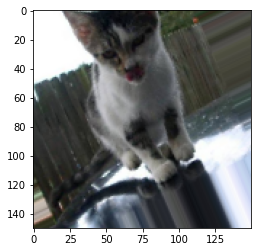

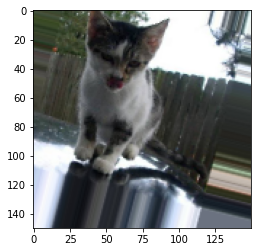

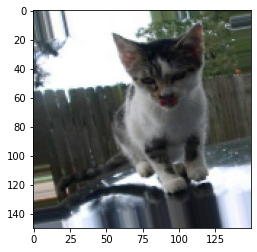

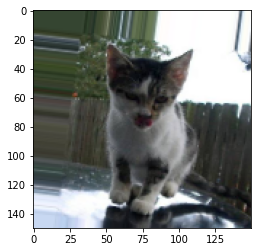

In [ ]:
image_augmention_plot(fname)